<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/DL-SatelliteImagery/Satellite_segmentation_Prediction-GradioUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip3 install -U segmentation-models

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 49.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 24.8 kB/s eta 0:00:0000:0100:15
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 KB 27.9 kB/s eta 0:00:00a 0:00:01


In [7]:
!pip3 install gradio

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.0 kB/s eta 0:00:0000:0100:16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 KB 15.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 KB 25.2 kB/s eta 0:00:00a 0:00:01
  Using cached python_multipart-0.0.9-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 KB 28.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 KB 15.5 kB/s eta 0:00:0000:0200:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 19.9 kB/s eta 0:00:0000:0100:13
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 KB 30.5 kB/s eta 0:00:00a 0:00:01
  Using cached tomlkit-0.12.0-py3-none-any.whl (37 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB 39.7 kB/s eta 0:00:00a 0:00:01
  Using cached aiofiles-23.2.1-py3-none-any.whl (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import os
import cv2
from PIL import Image 
import numpy as np 
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm
from matplotlib import pyplot as plt
import random

ModuleNotFoundError: No module named 'segmentation_models'

In [4]:
import gradio as gr
print(gr.__version__)

4.0.1


In [2]:
from keras import backend as K
import tensorflow.keras.backend as k
from keras.models import load_model 

In [6]:
import gradio as gr

In [3]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [4]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

NameError: name 'sm' is not defined

In [9]:
satellite_model = load_model('satellite-imagery_new.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss, 
                                          'jaccard_coef': jaccard_coef}))

In [10]:
satellite_model.get_config()

{'name': 'model_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_19',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_19',
   'inbound_nodes': [[['input_2', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'

In [11]:
image = Image.open('vitb1.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [12]:
image

array([[[[ 80, 121, 116],
         [110, 131, 120],
         [137, 145, 132],
         ...,
         [ 71, 125, 113],
         [ 71, 126, 114],
         [ 46, 112,  97]],

        [[176, 182, 177],
         [236, 237, 235],
         [231, 234, 232],
         ...,
         [217, 228, 226],
         [211, 224, 222],
         [ 78, 135, 122]],

        [[205, 201, 197],
         [223, 227, 227],
         [226, 232, 231],
         ...,
         [226, 235, 234],
         [220, 230, 229],
         [ 80, 133, 121]],

        ...,

        [[ 55, 119, 110],
         [ 52, 108, 103],
         [ 80, 124, 122],
         ...,
         [ 89,  84,  77],
         [ 88,  82,  80],
         [ 98,  96, 101]],

        [[ 72, 115, 107],
         [ 80, 109, 107],
         [ 84, 118, 115],
         ...,
         [117, 112, 107],
         [106, 101,  99],
         [107, 103, 109]],

        [[ 38, 109,  97],
         [ 35,  96,  92],
         [ 61, 116, 111],
         ...,
         [159, 151, 145],
        

In [13]:
prediction = satellite_model.predict(image)

1/1 [==============================] - 0s 423ms/step


In [14]:
prediction

array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0

In [15]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

In [16]:
type(predicted_image)

numpy.ndarray

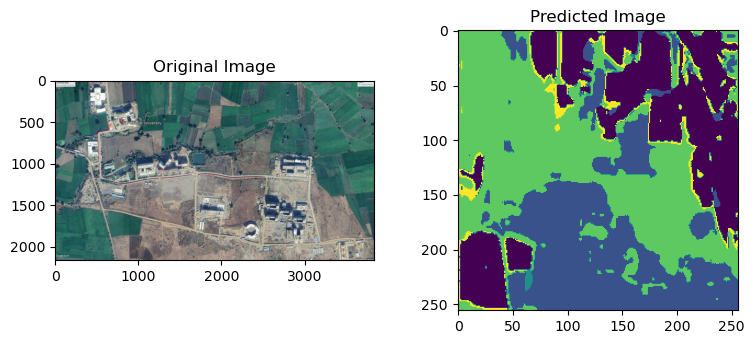

In [17]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('vitb1.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [18]:
def process_input_image(image_source):
  image = np.expand_dims(image_source, 0)

  prediction = satellite_model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)

  predicted_image = predicted_image[0,:,:]
  predicted_image = predicted_image * 50
  return 'Predicted Masked Image', predicted_image

In [19]:
my_app = gr.Blocks()

In [27]:
with my_app:
    gr.Markdown("Statellite Image Segmentation Application UI with Gradio")
    with gr.Tabs():
        with gr.TabItem("Select your image"):
            with gr.Row():
                with gr.Column():
                    img_source = gr.Image(label="Please select source Image", width = 256, height = 256)
                    source_image_loader = gr.Button("Load above Image")
                with gr.Column():
                    output_label = gr.Label(label="Image Info")
                    img_output = gr.Image(label="Image Output")
                    
            source_image_loader.click(
                process_input_image,
                [
                    img_source
                ],
                [
                    output_label,
                    img_output
                ]
            )

C:\Users\Dhaush Raj\AppData\Roaming\Python\Python39\site-packages\gradio\blocks.py:902: UserWarning: api_name process_input_image already exists, using process_input_image_1
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")


In [21]:
#!pip install gradio==4.0.1

In [25]:
my_app.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860


KeyboardInterrupt: 

In [26]:
my_app.close()

Closing server running on port: 7860
